In [1]:
library(ggplot2)
library(ggcorrplot)
library(gridExtra)

# Loading colour pallete librarry
library(RColorBrewer)
# Loading 12 colours from Paired pallert into our vector "my_pallete"
my_palette = c(brewer.pal(12, "Paired")[c(1:12)])

In [2]:
#Reading Csv file
df=read.csv("./winequality-red.csv")

# 1. Let us first watch a trailer of our datasets

In [3]:
#Saving only top 5 rows of dataset
write.csv(file ="./head.csv",head(df))
head(df)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


# 2. Summary of dataset

In [4]:
## Summary of data sets
df_summary=summary(df)
# Saving summary of data set
write.csv(file="./df_summary.csv", t(df_summary) )
df_summary

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

## 2.1 Number of Unique Values

In [5]:
# Unique values of quality coloumn of dataframe
unique(df$quality)

[1] 5 6 7 4 8 3

## 2.2 Frequency of qulaity 

In [6]:
# Frequency of occuarnce of each quality
table(df$quality)


  3   4   5   6   7   8 
 10  53 681 638 199  18 

## 2.3 Number of NULL values

In [7]:
# Findin number of nulls in data set. 
## is.na provides one true value for each null in dataset
sum(is.na(df))

[1] 0

## 3. Box plot of all indiviidual columns

png 
  2

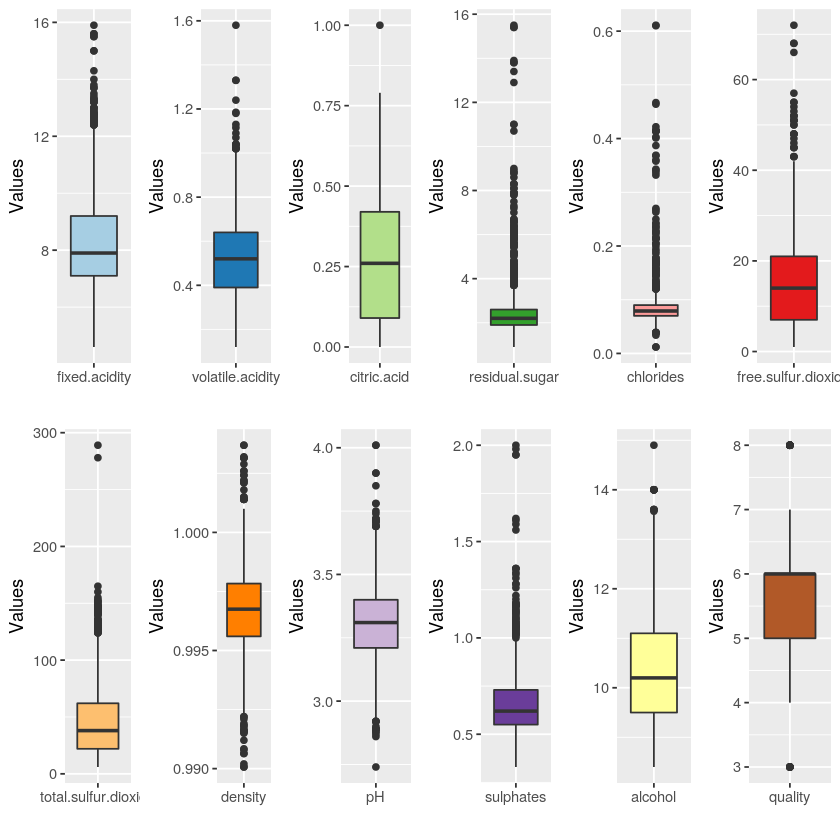

In [8]:
#######################################################################################################
####  BOX PLOT OF ALL INDIVIDUAL COLUMNS
#######################################################################################################

# Copying all column names to use in for loop
df_col=colnames(df)
# Creating emty list of to store all our chart
p = list()

# Starting for loop to traverse all 12 columns 
for(i in 1:12){
    #Picking up name of column
    col=df_col[i]
    # Stacking our data frame
    # All column willl be stacked  over one another 
    df_stack=stack(df)
    # Taking only those rows which contain our current column name
    df_stack_min=df_stack[df_stack$ind==df_col[i],]
    
    # Creating ggplot object containing chart
    p_small=ggplot(df_stack_min, aes(ind, values))+
    geom_boxplot(fill=my_palette[i])+
    labs(x="", y="Values")
    #Saving chart in list
    p[[i]] = p_small
}

# Saving chart as png
png("box_plot.png", res=300, width = 6, height = 6, units = 'in')
grid.arrange(p[[1]],p[[2]],
             p[[3]],p[[4]],
             p[[5]],p[[6]],
             p[[7]],p[[8]],
             p[[9]],p[[10]],
             p[[11]],p[[12]],ncol = 6)
dev.off()

#Displaying chart in arranged grid format
grid.arrange(p[[1]],p[[2]],
             p[[3]],p[[4]],
             p[[5]],p[[6]],
             p[[7]],p[[8]],
             p[[9]],p[[10]],
             p[[11]],p[[12]],ncol = 6)

# 4. Correlation Matrix

png 
  2

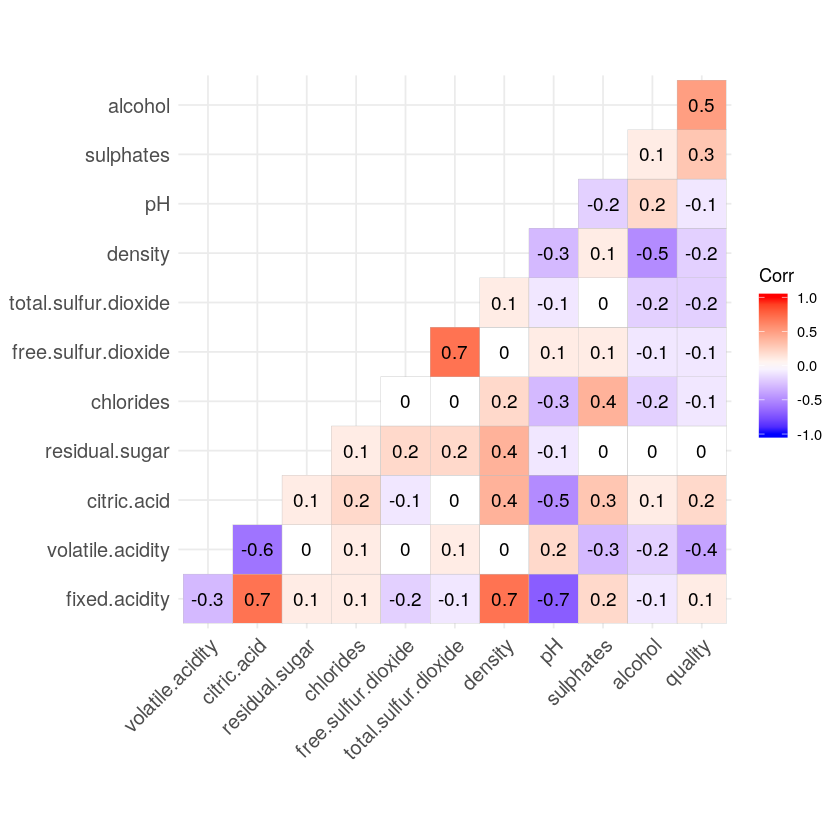

In [9]:
#######################################################################################################
#### CORRRELATION MATRIX PLOT
#######################################################################################################

# Finding correlation matrx of our dataframe
df_mat=cor(as.matrix(df))
# Rounding off the correlating matrix to only one decimal place, so that it is visible in chart.
df_mat=round(df_mat,1)

# Creating ggplot object for correlation matrix
p_corr=ggcorrplot(df_mat, lab = T, type="lower", insig = "blank")

# Saving ggplot object in png file
png("correlation_matrix.png", res=300, width = 6, height = 6, units = 'in')
print(p_corr)
dev.off()

# Displaying ggplot grpah
p_corr

# 5. Multivarient Box Plot

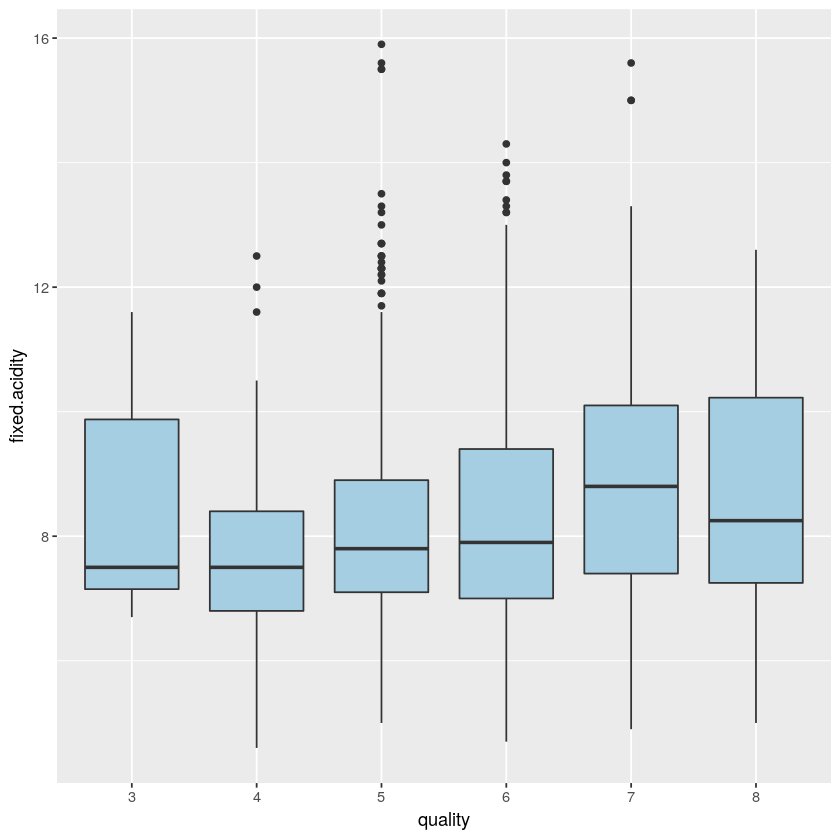

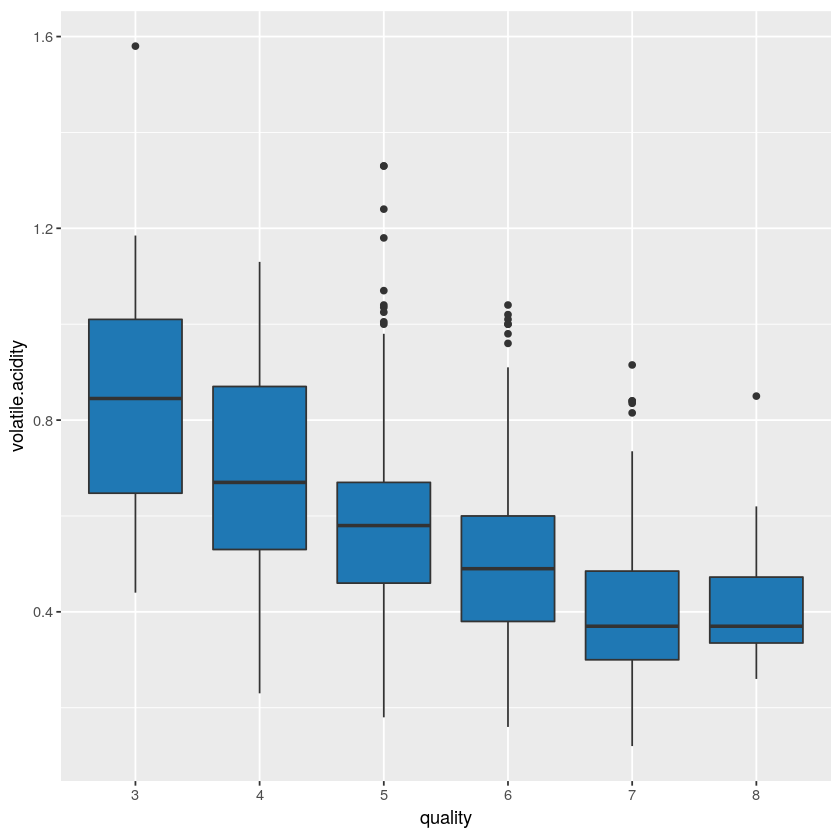

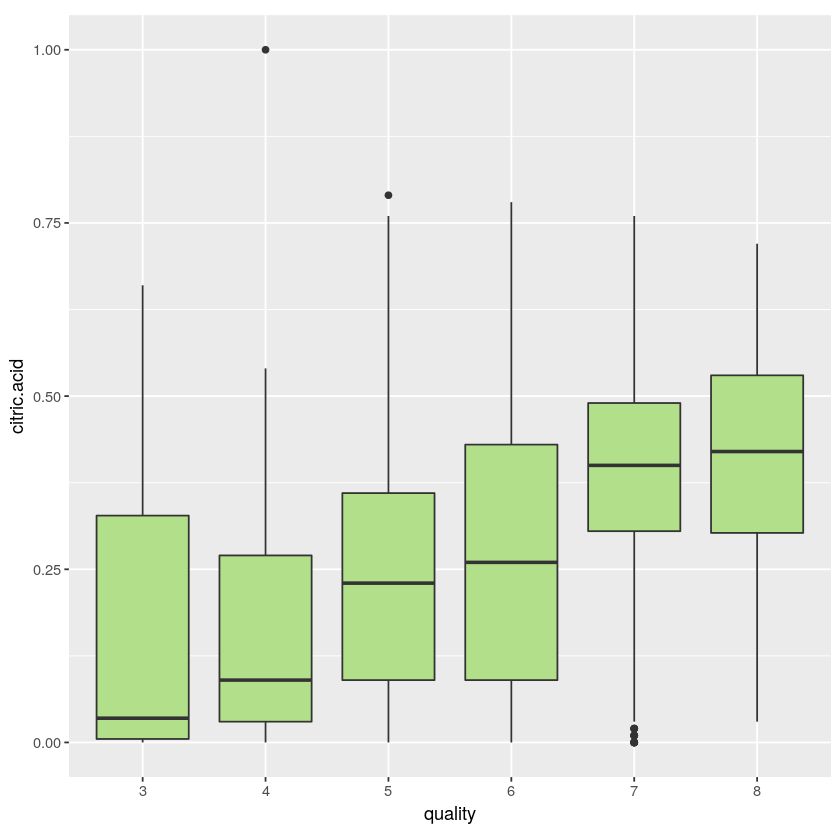

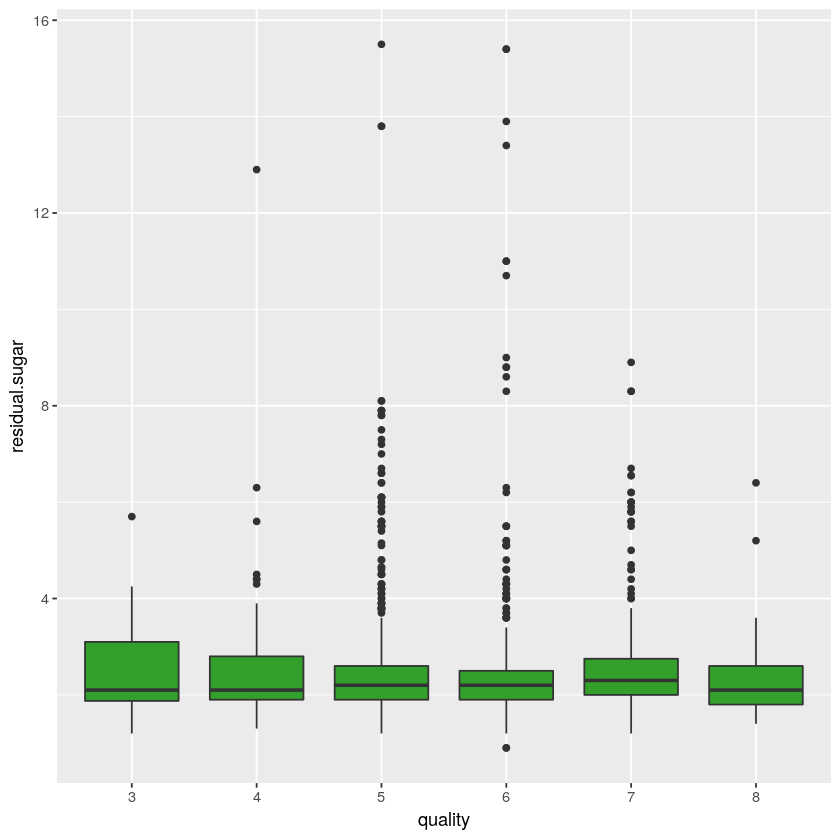

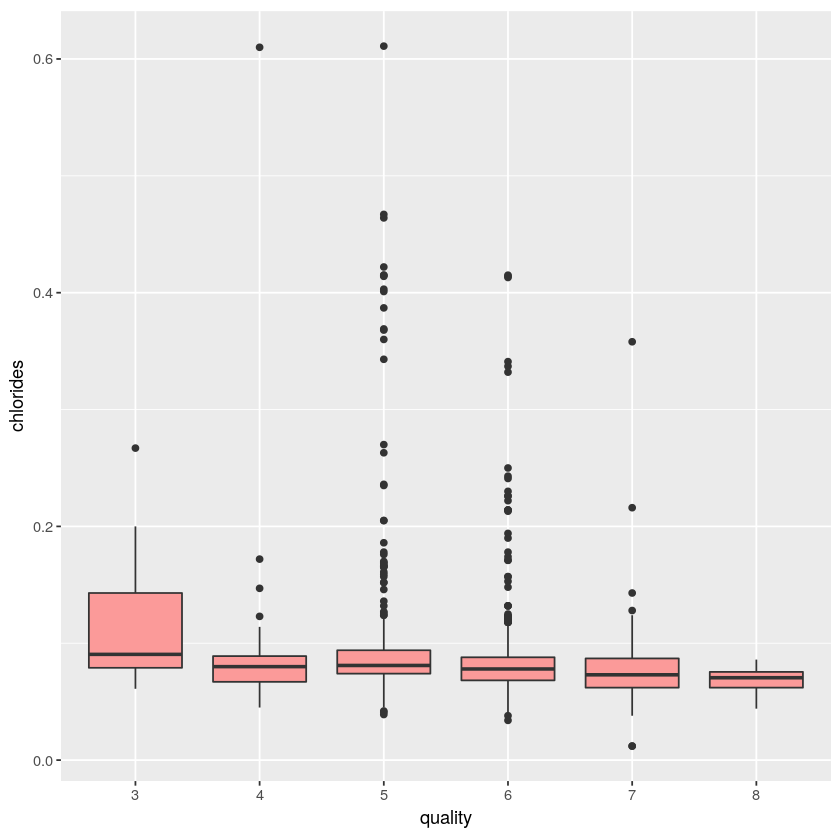

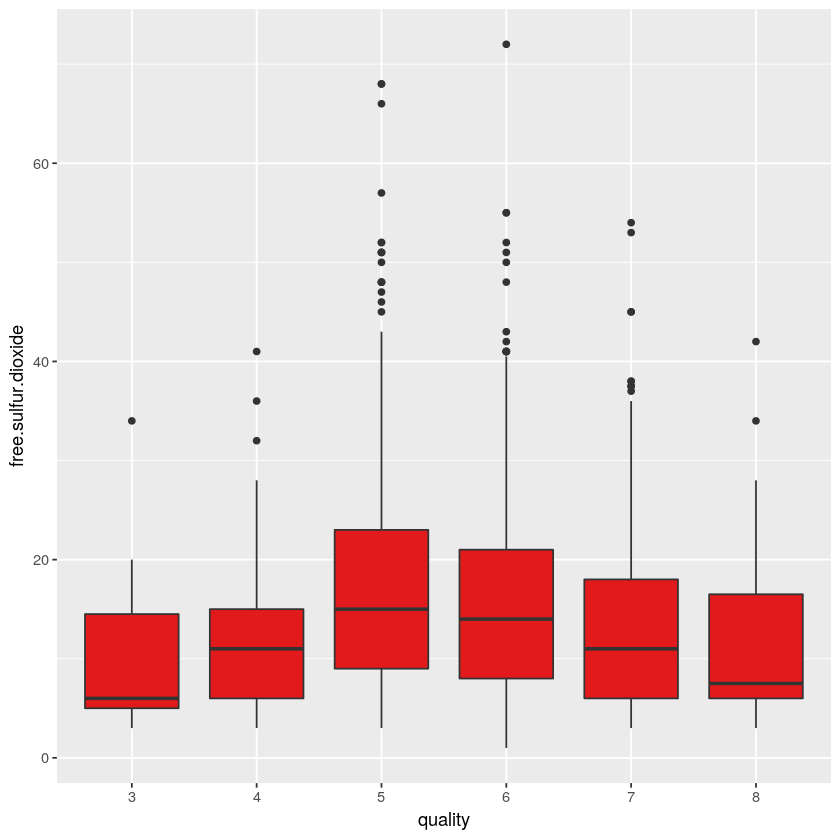

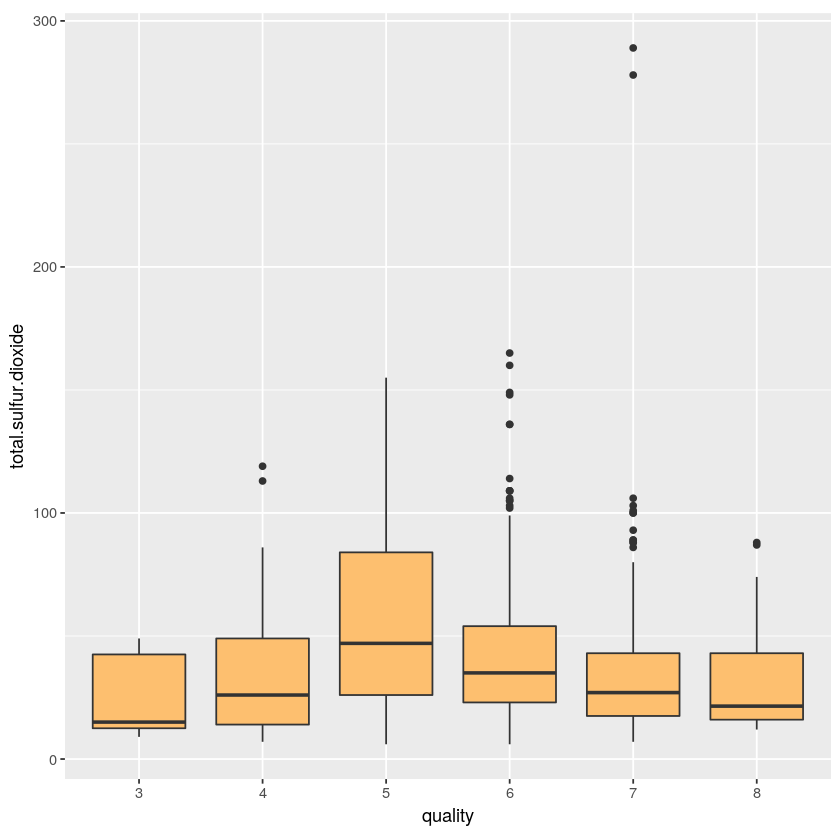

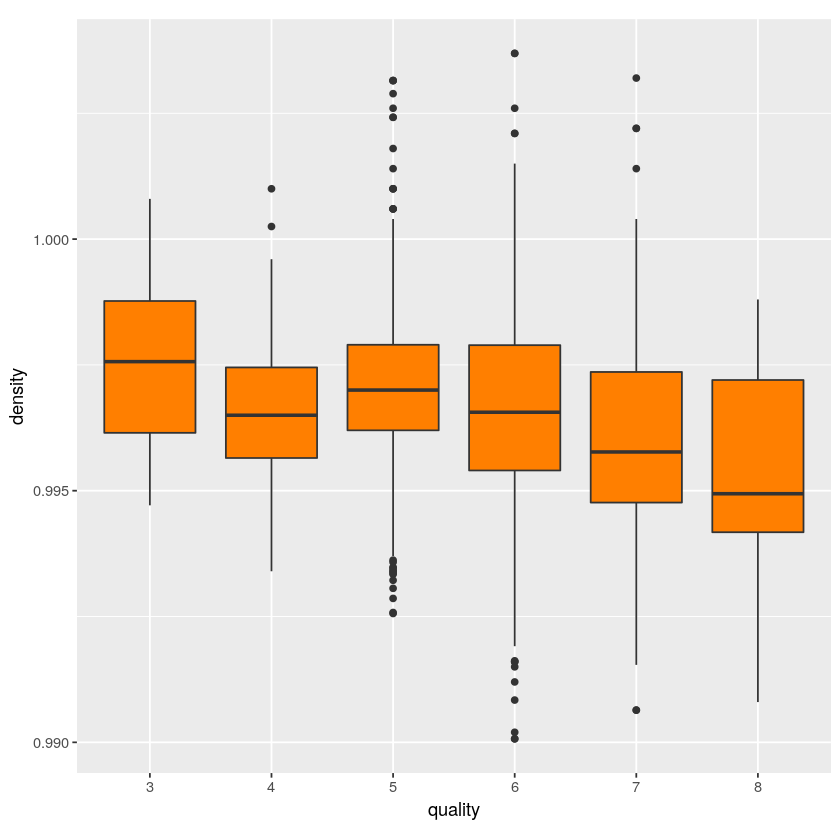

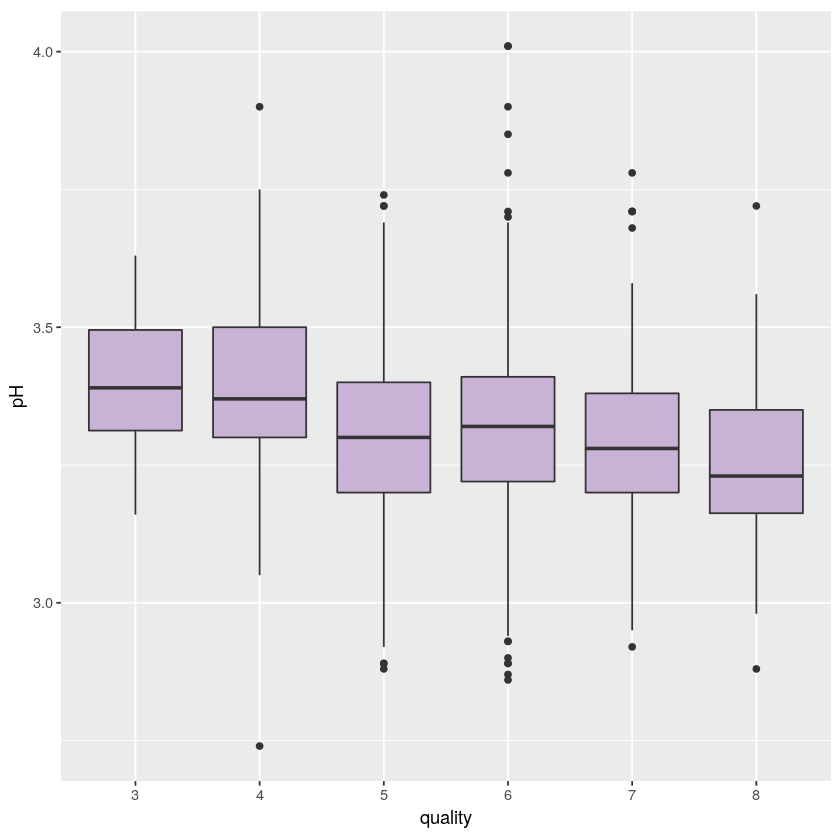

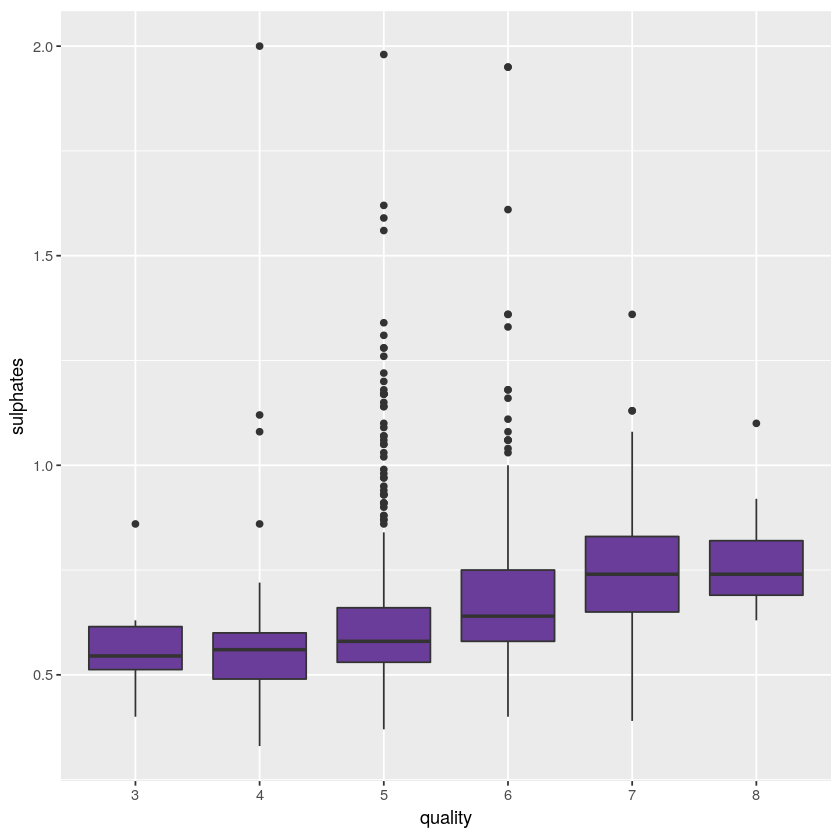

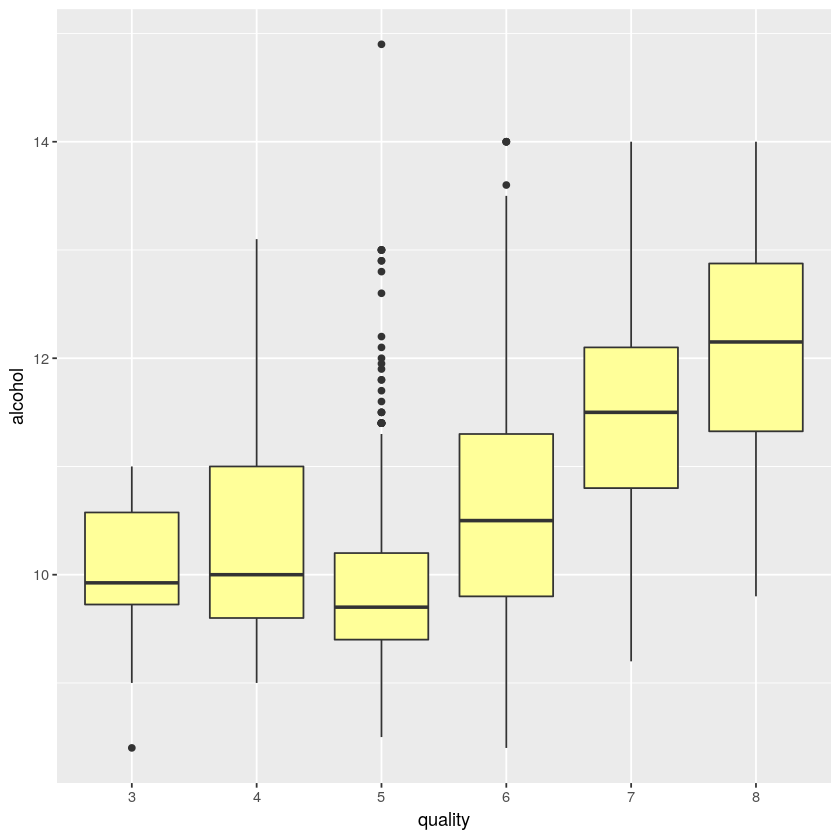

In [10]:
#######################################################################################################
#### MULTI VARIENT BOX PLOT OF ALL COLUMNS
#######################################################################################################

# Creating a copy of df with new name dfe
dfe=df
# Converting qualtiy column of dfe to factor variale for muti-varient plot
dfe$quality=as.factor(dfe$quality)

df_col=colnames(dfe)

# Creating empty list of to store all our chart
p = list()

# Starting for loop to traverse all 11 columns 
for(i in 1:11 ){
    #Picking up name of column
    col=df_col[i]
    # Creating ggplot object containing chart
    p_small=ggplot(dfe,  mapping=aes_string(x="quality",y =col)  )+
            geom_boxplot(fill=my_palette[i])+
     theme(aspect.ratio = 1)
    
    #Saving chart in list
    p[[i]] = p_small
}


# Displaying all the chart
for (i in 1:11){
print(p[[i]])
}

# Saving all the chart
for (i in 1:11){
file_name= paste("./multi_varient_box/", df_col[i], ".png", sep ="" )  
png(file=file_name)    
print(p[[i]])
dev.off()
}

# 6. Kernel Density graph for normality of each variables

png 
  2

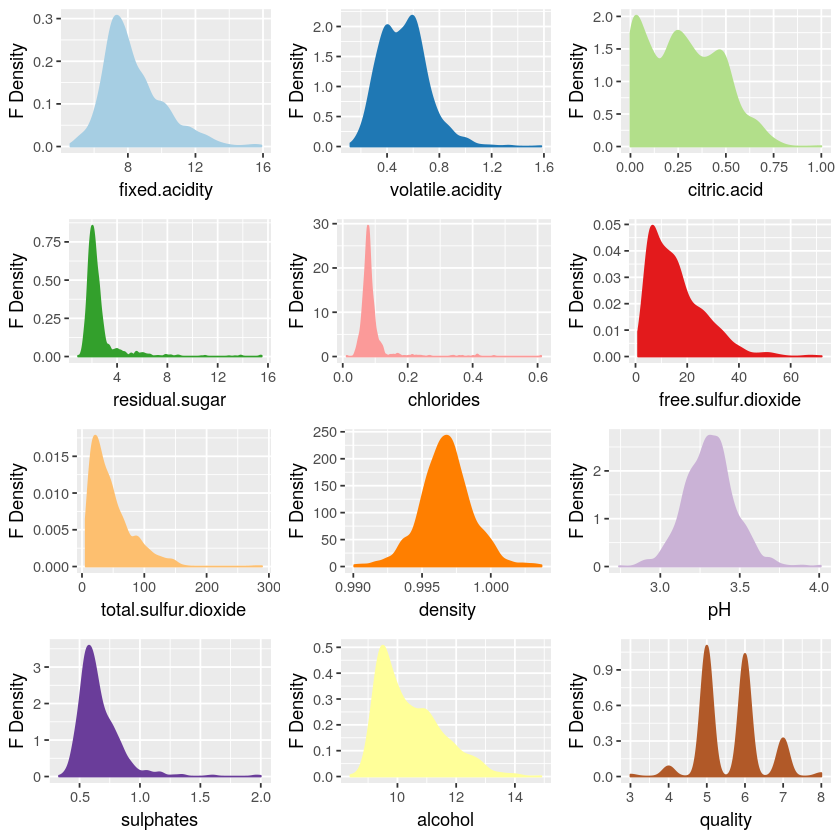

In [11]:
#######################################################################################################
#### KERNEL DENSITY GRAPH  
#######################################################################################################

df_col=colnames(df)
df_row=rownames(df)

p = list()


for(i in 1:12){
    #Get column from the column list
    col=df_col[i]
    
    #Stack all column oven one another
    df_stack=stack(df)
    
    #Take out one column of stack
    df_stack_min=df_stack[df_stack$ind==df_col[i],]
    
    #Make a graph object
    p_small=ggplot(df_stack_min, aes(x=values))+ ## Standard function 
            geom_density(color=my_palette[i], fill=my_palette[i])+ ## density graph
            labs(x=col, y = "F Density")

      
    p[[i]] = p_small ##Save the chart object in list
    
    
}

#Savinf the chart
png("kernel_density_estimate.png", res=300, width = 6, height = 6, units = 'in')
grid.arrange(p[[1]],p[[2]],
             p[[3]],p[[4]],
             p[[5]],p[[6]],
             p[[7]],p[[8]],
             p[[9]],p[[10]],
             p[[11]],p[[12]],ncol = 3)

dev.off()

# PLotting the chart 
grid.arrange(p[[1]],p[[2]],
             p[[3]],p[[4]],
             p[[5]],p[[6]],
             p[[7]],p[[8]],
             p[[9]],p[[10]],
             p[[11]],p[[12]],ncol = 3)

# 7. Pair Plots of all the columns

In [12]:
#######################################################################################################
#### PAIRS PLOT  
#######################################################################################################

# We need pairs3d library to get our chart, which depend upon shiny library 
library("shiny")
library("pairsD3")

#We use this command once to obtain the code to draw chart and then do not use this.
# shinypairs(df)

# 8. Pricipal Componenet analysis

In [13]:
#######################################################################################################
#### PRICIPAL COMPONENT ANALYSIS TABLE 
#######################################################################################################

#Using prcomp to get pricipal component analysis of wine.
# This summary is saved as part of df dataframe and can be acessed via df.pca
df.pca=prcomp(df, center = T, scale=T )

#Saving df.pca data in csv file, we use transpose here 
x=summary(df.pca)$importance
write.csv(file="pca.csv", t(x))

#Priting out prcomp data stored in df.pca
x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Standard deviation,1.766683,1.497292,1.297274,1.10228,0.9865412,0.8139977,0.7863319,0.7112472,0.6413326,0.5726425,0.4245216,0.2439629
Proportion of Variance,0.260100,0.186820,0.140240,0.10125,0.0811100,0.0552200,0.0515300,0.0421600,0.0342800,0.0273300,0.0150200,0.0049600
Cumulative Proportion,0.260100,0.446920,0.587160,0.68842,0.7695200,0.8247400,0.8762600,0.9184200,0.9527000,0.9800200,0.9950400,1.0000000


# 8.1 Plotting PCA 

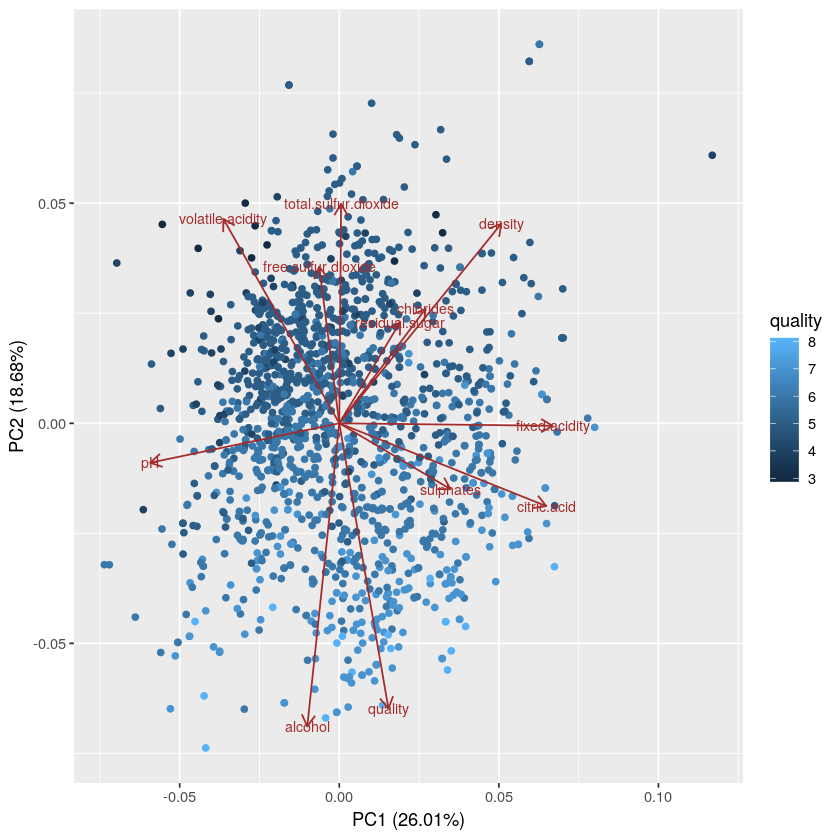

In [14]:
#######################################################################################################
#### PRICIPAL COMPONENT ANALYSIS PLOT 
#######################################################################################################

# Library to plot our prcomp data 
library(ggfortify)

#Sending df.pca object to autoplot for the graph
autoplot(df.pca,colour="quality",loadings=T, loadings.label=T, loadings.label.repel=T, loadings.label.size = 3,loadings.label.colour = "brown", loadings.colour = "brown")

# 9. Simple regression

In [15]:
#######################################################################################################
#### PERFORMING SIMPLE REGRESSION
#######################################################################################################

# Using simple ols regression
ols_df=lm(quality ~ ., data=df)
df_summary=summary(ols_df)
df_summary


Call:
lm(formula = quality ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68911 -0.36652 -0.04699  0.45202  2.02498 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.197e+01  2.119e+01   1.036   0.3002    
fixed.acidity         2.499e-02  2.595e-02   0.963   0.3357    
volatile.acidity     -1.084e+00  1.211e-01  -8.948  < 2e-16 ***
citric.acid          -1.826e-01  1.472e-01  -1.240   0.2150    
residual.sugar        1.633e-02  1.500e-02   1.089   0.2765    
chlorides            -1.874e+00  4.193e-01  -4.470 8.37e-06 ***
free.sulfur.dioxide   4.361e-03  2.171e-03   2.009   0.0447 *  
total.sulfur.dioxide -3.265e-03  7.287e-04  -4.480 8.00e-06 ***
density              -1.788e+01  2.163e+01  -0.827   0.4086    
pH                   -4.137e-01  1.916e-01  -2.159   0.0310 *  
sulphates             9.163e-01  1.143e-01   8.014 2.13e-15 ***
alcohol               2.762e-01  2.648e-02  10.429  < 2e-16 ***
---
S

## 9.1 Summary of Simple Regression

In [16]:
#######################################################################################################
#### REGRESSION COEFFICIENT TABLE
#######################################################################################################

# Displaying regression data in tabular format 
# containing only coefficints
df_summary$coefficients

#Saving regression summary 
write.csv(file="regression.csv", df_summary$coefficients)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),21.965208449,2.119457e+01,1.0363599,3.001921e-01
fixed.acidity,0.024990553,2.594850e-02,0.9630827,3.356528e-01
volatile.acidity,-1.083590259,1.211013e-01,-8.9478019,9.872361e-19
citric.acid,-0.182563948,1.471762e-01,-1.2404449,2.149942e-01
residual.sugar,0.016331270,1.500210e-02,1.0885992,2.764960e-01
chlorides,-1.874225158,4.192832e-01,-4.4700697,8.373953e-06
free.sulfur.dioxide,0.004361333,2.171292e-03,2.0086353,4.474495e-02
total.sulfur.dioxide,-0.003264580,7.287285e-04,-4.4798298,8.004610e-06
density,-17.881163832,2.163310e+01,-0.8265650,4.086079e-01
pH,-0.413653144,1.915974e-01,-2.1589710,3.100189e-02
